### Project Description

The project is about building a price prediction model for used car . The dataset is collected from Open Data Nepal. The dataset consists of 12 features:
1. Brand: The brand of the car
2. Model: Car's model
3. Model_year: The year when the car was manufactured
4. Transmission: The transmission allows the vehicle to change gears,
5. Engine_size(cc): the size of an engine refers to the total volume of air and fuel being pushed through the engine by the cylinders. It's measured in cubic centimetres (cc). 
6. Drivetrain: the system in a motor vehicle which connects the transmission to the drive axles. 2WD-Two Wheel Drive and 4WD-Four Wheel Drive
7. Fuel_type: Car fuel type-Petrol or diesel
8. Colour: Color of the car
9. Lot_no: A lot number is an identification number assigned to a particular quantity like car. 
10. Kilometer: distance covered in kilometer
11. Status: used or new car
12. Price: price of the car

### Importing packages

In [2113]:
#import all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [2114]:
df = pd.read_csv('used_car_data.csv')
df.head()

,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Colour,Lot_no,Kilometer,Status,Price
0,Chevrolet,aveo,2009,Manual,1150,2WD,Petrol,golden,6,200,USED,Rs. 975000
1,Chevrolet,captiva,2015,Automatic,2000,4WD,Diesel,Grey,8,100,USED,Rs. 3000000
2,Chevrolet,aveo,2009,Manual,1150,2WD,Petrol,golden,6,42000,USED,Rs. 975000
3,Chevrolet,captiva,2010,Automatic,2000,4WD,Diesel,Grey,8,51000,USED,Rs. 3000000
4,Chevrolet,spark,2012,Manual,1000,2WD,Petrol,Sky Blue,9,38000,USED,Rs. 1000000


In [2115]:
df.shape

(2217, 12)

In [2116]:
df['Status'].unique()

array(['USED', nan], dtype=object)

#####  Since we know that the vehicles are used vehicle so this column 'Status' has no use.

In [2117]:
df.drop(['Status'], axis='columns', inplace=True)

In [2118]:
df.head()

,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Colour,Lot_no,Kilometer,Price
0,Chevrolet,aveo,2009,Manual,1150,2WD,Petrol,golden,6,200,Rs. 975000
1,Chevrolet,captiva,2015,Automatic,2000,4WD,Diesel,Grey,8,100,Rs. 3000000
2,Chevrolet,aveo,2009,Manual,1150,2WD,Petrol,golden,6,42000,Rs. 975000
3,Chevrolet,captiva,2010,Automatic,2000,4WD,Diesel,Grey,8,51000,Rs. 3000000
4,Chevrolet,spark,2012,Manual,1000,2WD,Petrol,Sky Blue,9,38000,Rs. 1000000


### Handling Missing Values

In [2119]:
df.isnull().sum()

Brand              316
Model              316
Model_year         316
Transmission       316
Engine_size(cc)    316
Drivetrain         316
Fuel_type          316
Colour             316
Lot_no             316
Kilometer          316
Price              316
dtype: int64

###### There are equal no of missing values in all columns of the dataset. But when I see the dataset I found that these are not missing values but empty rows thatswhy all missing values are equal so we remove the these empty rows.

In [2120]:
cols=['Brand','Model','Model_year','Transmission','Engine_size(cc)','Drivetrain','Fuel_type','Colour','Lot_no','Kilometer','Price']
cols

['Brand',
 'Model',
 'Model_year',
 'Transmission',
 'Engine_size(cc)',
 'Drivetrain',
 'Fuel_type',
 'Colour',
 'Lot_no',
 'Kilometer',
 'Price']

In [2121]:
df.replace('',np.nan, inplace=True)
df.tail()

,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Colour,Lot_no,Kilometer,Price
2212,Volkswagen,passat,2010,Manual,1800,2WD,Petrol,black,8,11000,Rs. 5800000
2213,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,nan,NaN
2214,Volkswagen,tiguan,2010,Manual,2000,2WD,Petrol,India blue,8,25000,Rs. 4900000
2215,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,nan,NaN
2216,Volkswagen,vento,2012,Manual,1600,2WD,Diesel,Silver,11,14000,Rs. 3555555


In [2122]:
df.dropna(subset=cols,inplace=True)
df.tail()

,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Colour,Lot_no,Kilometer,Price
2210,Volkswagen,polo,2013,Manual,1600,2WD,Petrol,Silver,11,6300,Rs. 2700000
2211,Volkswagen,beetle,2010,Manual,1595,2WD,Petrol,Maroon Red,8,19000,Rs. 3950000
2212,Volkswagen,passat,2010,Manual,1800,2WD,Petrol,black,8,11000,Rs. 5800000
2214,Volkswagen,tiguan,2010,Manual,2000,2WD,Petrol,India blue,8,25000,Rs. 4900000
2216,Volkswagen,vento,2012,Manual,1600,2WD,Diesel,Silver,11,14000,Rs. 3555555


In [2123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1901 entries, 0 to 2216
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            1901 non-null   object 
 1   Model            1901 non-null   object 
 2   Model_year       1901 non-null   float64
 3   Transmission     1901 non-null   object 
 4   Engine_size(cc)  1901 non-null   float64
 5   Drivetrain       1901 non-null   object 
 6   Fuel_type        1901 non-null   object 
 7   Colour           1901 non-null   object 
 8   Lot_no           1901 non-null   float64
 9   Kilometer        1901 non-null   float64
 10  Price            1901 non-null   object 
dtypes: float64(4), object(7)
memory usage: 178.2+ KB


###### Price is an object datatype that is bacause of the 'Rs.' . Price column has 'Rs' in every row  so we remove 'Rs' and make it integer

In [2124]:
df['Price'] = (df['Price'].str.strip('Rs. ').astype('int64'))
df['Price'].head()

0     975000
1    3000000
2     975000
3    3000000
4    1000000
Name: Price, dtype: int64

###### Here we have both categorical and numerical data. lets separate numerical and categorical into 2 groups

In [2125]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Model_year', 'Engine_size(cc)', 'Lot_no', 'Kilometer', 'Price']

In [2126]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['Brand', 'Model', 'Transmission', 'Drivetrain', 'Fuel_type', 'Colour']

### Numerical data analysis

###### Model is in year date form . lets keep it in number of years (2021-year_date)

In [2127]:
df.loc[:, "Model_year"] = df["Model_year"].apply(lambda x: 2021-x) # Model_year is in year(date) form so converting it into no of year form.
df.head()

,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Colour,Lot_no,Kilometer,Price
0,Chevrolet,aveo,12,Manual,1150,2WD,Petrol,golden,6,200,975000
1,Chevrolet,captiva,6,Automatic,2000,4WD,Diesel,Grey,8,100,3000000
2,Chevrolet,aveo,12,Manual,1150,2WD,Petrol,golden,6,42000,975000
3,Chevrolet,captiva,11,Automatic,2000,4WD,Diesel,Grey,8,51000,3000000
4,Chevrolet,spark,9,Manual,1000,2WD,Petrol,Sky Blue,9,38000,1000000


In [2128]:
df[num_features].describe()

,Model_year,Engine_size(cc),Lot_no,Kilometer,Price
count,1901,1901,1901,1901,1901
mean,12,1420,8,41095,2024845
std,4,508,3,38439,1797278
min,2,624,1,100,2011
25%,9,1100,6,25000,1190000
50%,11,1200,8,36000,1575000
75%,13,1600,10,50000,2400000
max,35,4400,22,800000,32000000


Statistical Analysis:

+ The used car are as old as 35 years and as new as 2 years.
+ All features have mean and median almost equal so we can say that  dataset looks perfectly symmetrical distribution.(normal distribution) but they are not normal because of outliers.
+ For the features model_year, Kilometer and price,the difference in 75th percentile and max is too high. That means they have some outlier values.
For it to be Gaussian distribution we have empirical formula the data should lies between (mean-3*sd, mean, mean+3*sd).Anyvalue outside the range is an outliers. The presence of outlier can be determine without calculation

### Outlier Removal

InterQuantile Range
75%- 25% values in a dataset

Steps
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4. Find lower bound q1*1.5
5. Find upper bound q3*1.5


Anything that lies outside of lower and upper bound is an outlier

In [2129]:
def outlier_removal(data):
  quantile1, quantile3= np.percentile(sorted(np.array(df[data])),[25,75])
  ## Find the IQR
  iqr_value=quantile3-quantile1
  ## Find the lower bound value and the higher bound value
  lower_bound_val = quantile1 -(1.5 * iqr_value) 
  upper_bound_val = quantile3 +(1.5 * iqr_value)
  df.drop(df[df[data] > upper_bound_val].index, inplace=True)
  return df.shape

In [2130]:
outlier_removal('Price')

(1774, 11)

In [2131]:
outlier_removal('Kilometer')

(1708, 11)

In [2132]:
outlier_removal('Engine_size(cc)')

(1596, 11)

In [2133]:
outlier_removal('Model_year')

(1532, 11)

Here most of the outliers are upper bound so I am only focusing in removing the upper bound values


### EDA Analysis

In [2134]:
# corelation analysis
co_relation=df.corr()
co_relation

,Model_year,Engine_size(cc),Lot_no,Kilometer,Price
Model_year,1,0,-1,1,-0
Engine_size(cc),0,1,-0,0,1
Lot_no,-1,-0,1,-1,0
Kilometer,1,0,-1,1,-0
Price,-0,1,0,-0,1


+ Price has negative corelation with Model_year and Kilometer. 
+ The car with high kilometer travelled is supposed to be very old car over course of time so price should be low.
+ The car manufactured long back ago will have greater model_year but is old so the price should be low.
+ Price has positive corelation with Engine_size and lot_no
+ Engine size higher means expenisve car so price is sufficiently high.
+ Lot no is positively corelated to price
+ Model year and Lot no are negatively strong correlated as both represent the age of the vehicle but in opposite way.

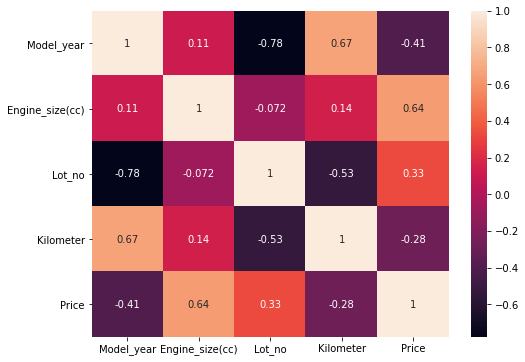

In [2135]:
plt.rcParams['figure.figsize'] = (8, 6)
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

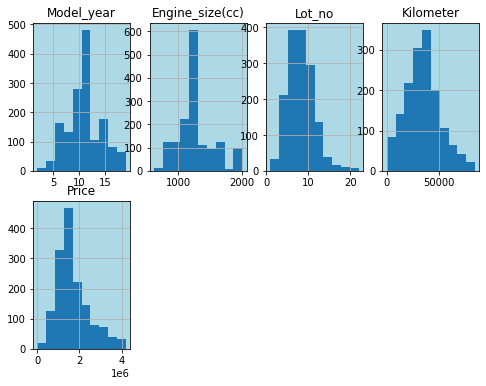

In [2136]:
for i,feature in enumerate(num_features):
    plt.subplot(2,4,i+1 , facecolor='#ADD8E6' )
    df[feature].hist()
    plt.title(feature)

By figure the data is shifted centrally after removing the outliers

In [2137]:
pd.options.display.float_format = '{:.0f}'.format

In [2138]:
# Defining box_plot and scatter plot & kde_plot functions

def make_boxplot(feature):
    plt.rcParams['figure.figsize'] = (8, 6)
    sns.boxplot(x=df[feature])
    

def scatters(col1,col2):
    plt.rcParams['figure.figsize'] = (6, 4)
    fig = px.scatter(df, x=col1, y=col2 )
    return fig.show()

def make_kdeplot(feature) : 
    plt.rcParams['figure.figsize'] = (8, 6)
    sns.kdeplot(df[feature], shade=True)

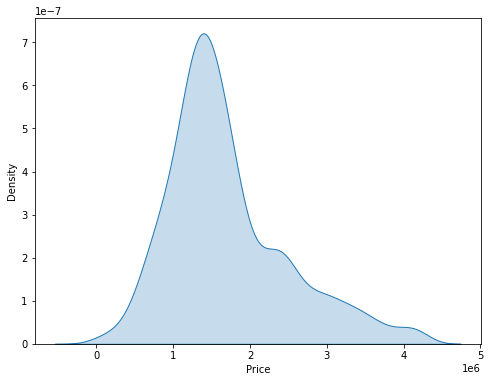

In [2139]:
make_kdeplot('Price')

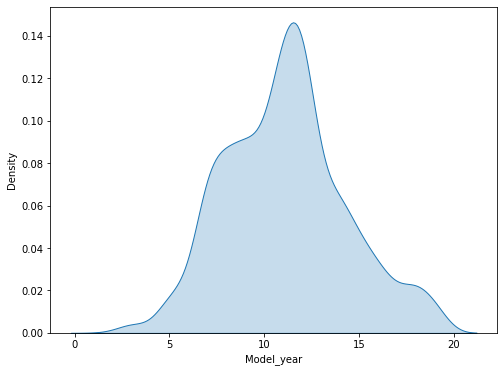

In [2140]:
make_kdeplot('Model_year')

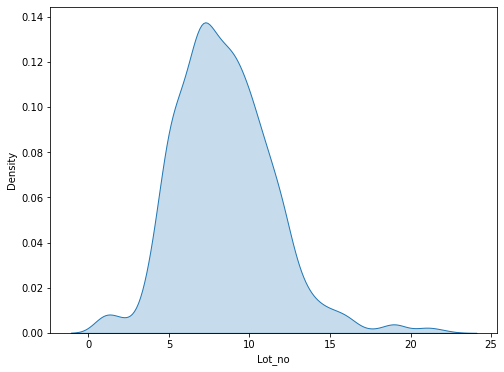

In [2141]:
make_kdeplot('Lot_no')

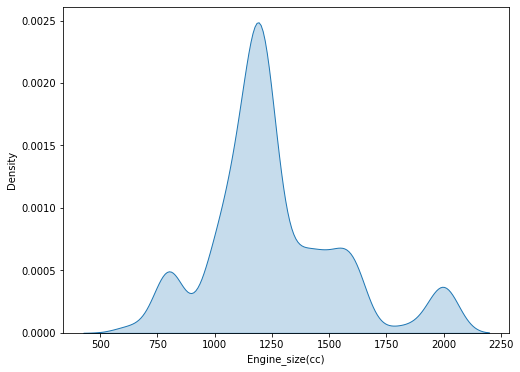

In [2142]:
make_kdeplot('Engine_size(cc)')

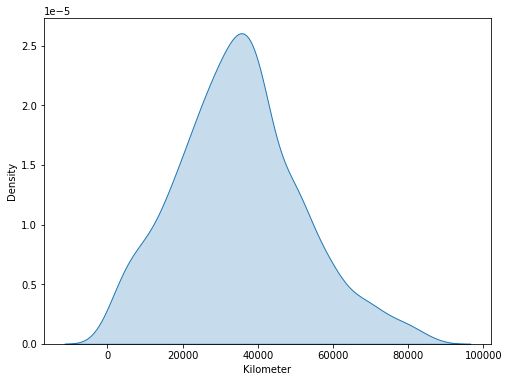

In [2143]:
make_kdeplot('Kilometer')

In [2144]:
scatters('Model_year','Price') 

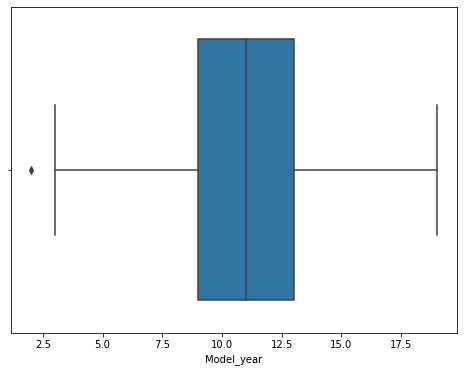

In [2145]:
make_boxplot('Model_year')

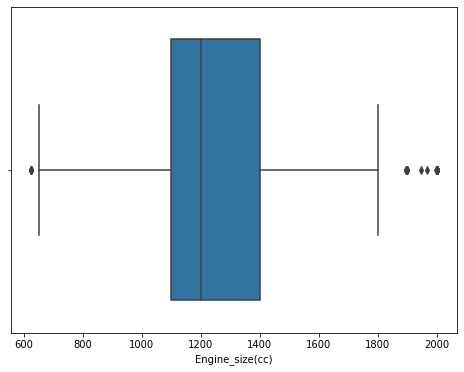

In [2146]:
make_boxplot('Engine_size(cc)')

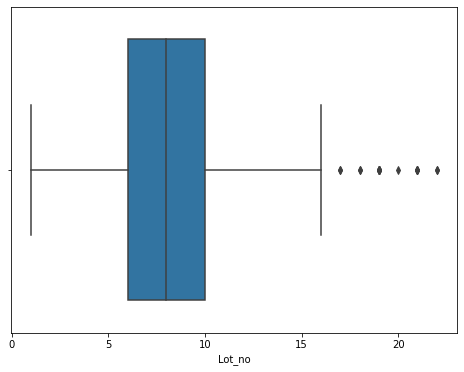

In [2147]:
make_boxplot('Lot_no')

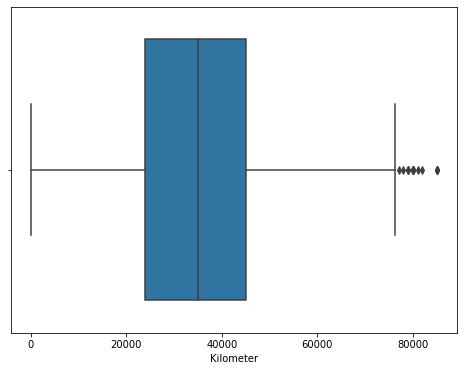

In [2148]:
make_boxplot('Kilometer')

In [2149]:
scatters('Kilometer','Price')

Kilometer had few outliers on both sides and after we remove it now the distribution is shifted to central

### Categorical Data Analysis

In [2151]:
for column in cat_features:
  print('{} has {} values '.format(column,df[column].unique()))
  print('\n')

Brand has ['Chevrolet' 'Fiat' 'Ford' 'Honda' 'Hyundai' 'Kia' 'Mahindra'
 'Maruti Suzuki' 'Nissan' 'Skoda' 'Tata' 'Toyota' 'Volkswagen'] values 


Model has ['aveo' 'captiva' 'spark' 'beat' 'u-va' 'uva' 'sedan' 'avventura' 'punto'
 'linea' 'figo' 'palio' 'ecosport' 'titanium' 'fiesta' 'cr-v' 'city'
 'jazz' 'brio' 'civic' 'crv' 'i10' 'santro' 'i20' 'getz' 'accent' 'asta'
 'tucson' 'eon' 'creta' 'elite' 'elantra' 'sonata' 'sportage' 'picanto'
 'soul' 'rio' 'sephia' 'carens' 'cerato' 'Kuv' 'scorpio' 'bolero' 'swift'
 'alto-800' 'celerio' 'alto-LXI' '800' 'eeco' 'Omni' 'astar' 'alto'
 'dzire' 'a-star' 'saloon' 'sunny' 'tiida' 'fabia' 'laura' 'rapid'
 'octavia' 'ace' 'indica' 'bolt' 'nano' 'grande' 'manza' 'venture' 'sumo'
 'indigo' 'corolla' 'etios' 'avanza' 'echo' 'hilux' 'polo' 'beetle'
 'tiguan' 'vento'] values 


Transmission has [' Manual' ' Automatic'] values 


Drivetrain has [' 2WD' ' 4WD'] values 


Fuel_type has [' Petrol' ' Diesel'] values 


Colour has [' golden' ' Grey' ' Sky B

###### For categorical variables which has only 2 classes can be converted to 0 and 1 . 

In [2152]:
df['Transmission'].unique()

array([' Manual', ' Automatic'], dtype=object)

In [2153]:
df['Transmission']=df['Transmission'].replace([' Manual',' Automatic'], [0,1])
df['Transmission'].unique()

array([0, 1])

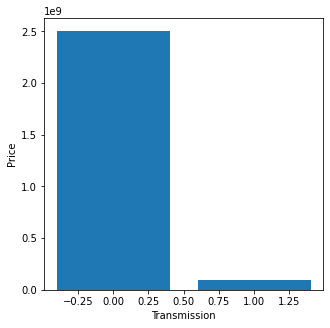

In [2154]:
# lets check how transmission affects our price feature
plt.subplots(figsize=(5,5))
city_revenue_group = df["Price"].groupby(df["Transmission"])
agg_data = city_revenue_group.sum()
x_axis = agg_data.index
y_axis = agg_data
plt.bar(x_axis,y_axis)
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.show()


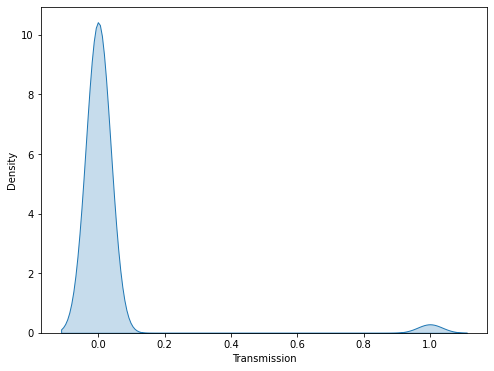

In [2155]:
make_kdeplot('Transmission')

There are many manual transmission type cars and very few automatic 

In [2156]:
df['Transmission'].value_counts()

0    1491
1      41
Name: Transmission, dtype: int64

In [2157]:
df['Drivetrain'].unique()

array([' 2WD', ' 4WD'], dtype=object)

In [2158]:
df['Drivetrain']=df['Drivetrain'].replace([' 2WD',' 4WD'], [0,1]) 

In [2159]:
scatters('Drivetrain','Price')

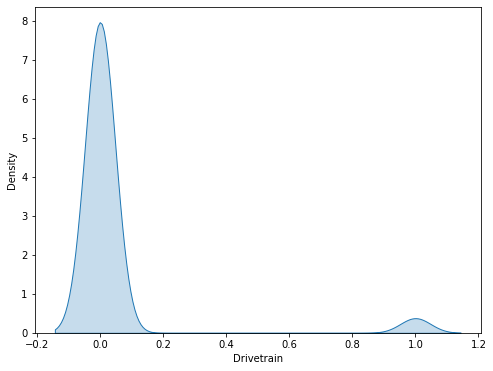

In [2160]:
make_kdeplot('Drivetrain')

From the figure it seems like there is more 2WD than 4WD. 

In [2161]:
df['Fuel_type'].unique()

array([' Petrol', ' Diesel'], dtype=object)

In [2162]:
df['Fuel_type']=df['Fuel_type'].replace([' Petrol', ' Diesel'],[0,1])

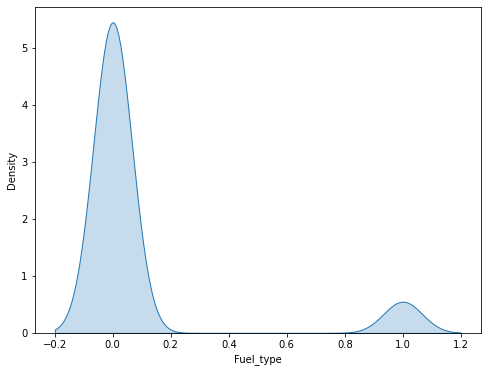

In [2163]:
make_kdeplot('Fuel_type')

There are more petrol fuel vehicle  than diesel fueled vehicle. The data seems to be imbalanced among its classes.

In [2164]:
df['Colour'].unique()

array([' golden', ' Grey', ' Sky Blue ', ' Green', ' Maroon',
       ' royal black', ' metalic sky blue', ' Golden Silver ', ' Red',
       ' Lilene Beige', ' White', ' Bue', ' Light Golden', ' Silver',
       ' Sky blue', ' golden silver', ' silver', ' Metallic', ' Golden',
       ' Gray', ' Black', ' WHITE', ' Platinum Metallic', ' Dark Gray',
       ' Blue', ' black', ' Chocolate Grey', ' Caviar Black ', ' SILVER',
       ' white ', '  Pearl Silver', ' orange ', ' Velvet Red', ' Beige',
       ' sky blue', ' Caviar Black', ' Sandive grey', ' Silver ',
       ' Cream Blue', ' Off white ', ' dark grey', ' White ',
       ' Golden Grey', ' Moondust Silver', ' Mars Red', ' smoke grey',
       ' White Gold', ' Orange', ' Chilly Silver ', ' grey', ' white',
       ' Sea greay', ' Space gray', ' Paprika Red', ' Chill',
       ' Sea gray ', ' Sea Grey', ' Siver', ' Diamond white',
       ' Dark grey', ' silky silver', ' milky white', ' squeeze ',
       ' Gray ', ' Metalic Grey', ' Paprika 

##### Actually Color would have more impact if the problem was about which car would get sold faster but it is about predicting the price  and color is personal preference and  has no role in determining the price of the car so I am removing the 'Colour' column

In [2165]:
df.drop(['Colour'],axis='columns',inplace=True)

In [2166]:
df['Brand'].unique(), len(df['Brand'].unique())

(array(['Chevrolet', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Kia', 'Mahindra',
        'Maruti Suzuki', 'Nissan', 'Skoda', 'Tata', 'Toyota', 'Volkswagen'],
       dtype=object), 13)

In [2167]:
df['Model'].unique(),len(df['Model'].unique())

(array(['aveo', 'captiva', 'spark', 'beat', 'u-va', 'uva', 'sedan',
        'avventura', 'punto', 'linea', 'figo', 'palio', 'ecosport',
        'titanium', 'fiesta', 'cr-v', 'city', 'jazz', 'brio', 'civic',
        'crv', 'i10', 'santro', 'i20', 'getz', 'accent', 'asta', 'tucson',
        'eon', 'creta', 'elite', 'elantra', 'sonata', 'sportage',
        'picanto', 'soul', 'rio', 'sephia', 'carens', 'cerato', 'Kuv',
        'scorpio', 'bolero', 'swift', 'alto-800', 'celerio', 'alto-LXI',
        '800', 'eeco', 'Omni', 'astar', 'alto', 'dzire', 'a-star',
        'saloon', 'sunny', 'tiida', 'fabia', 'laura', 'rapid', 'octavia',
        'ace', 'indica', 'bolt', 'nano', 'grande', 'manza', 'venture',
        'sumo', 'indigo', 'corolla', 'etios', 'avanza', 'echo', 'hilux',
        'polo', 'beetle', 'tiguan', 'vento'], dtype=object), 79)

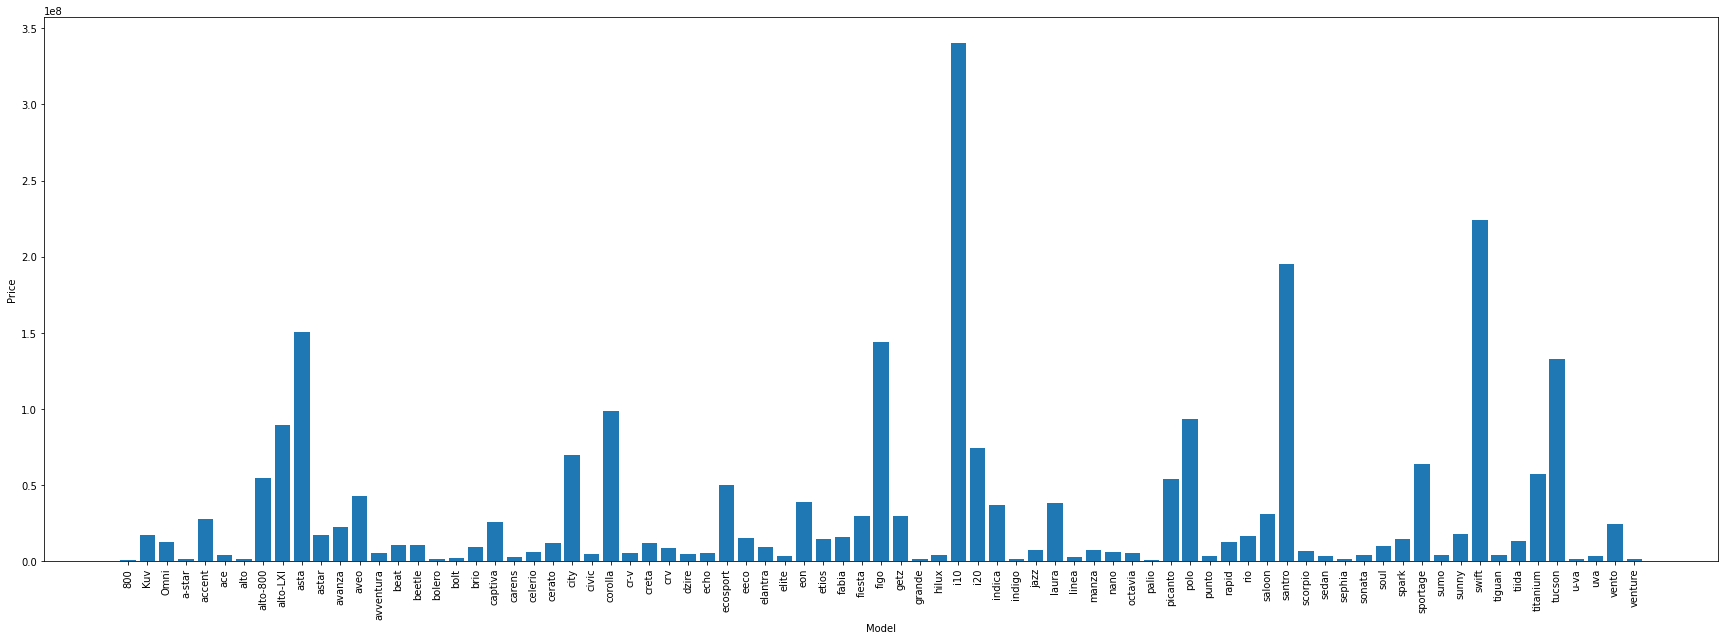

In [2168]:
# lets check how car model affects our price feature
plt.subplots(figsize=(30,10))
city_revenue_group = df["Price"].groupby(df["Model"])
agg_data = city_revenue_group.sum()
x_axis = agg_data.index
y_axis = agg_data
plt.bar(x_axis,y_axis)
plt.xticks(rotation=90)
plt.xlabel("Model")
plt.ylabel("Price")
plt.show()

The maximum sold used car is i10, Santro, Swift, Figo and Asta

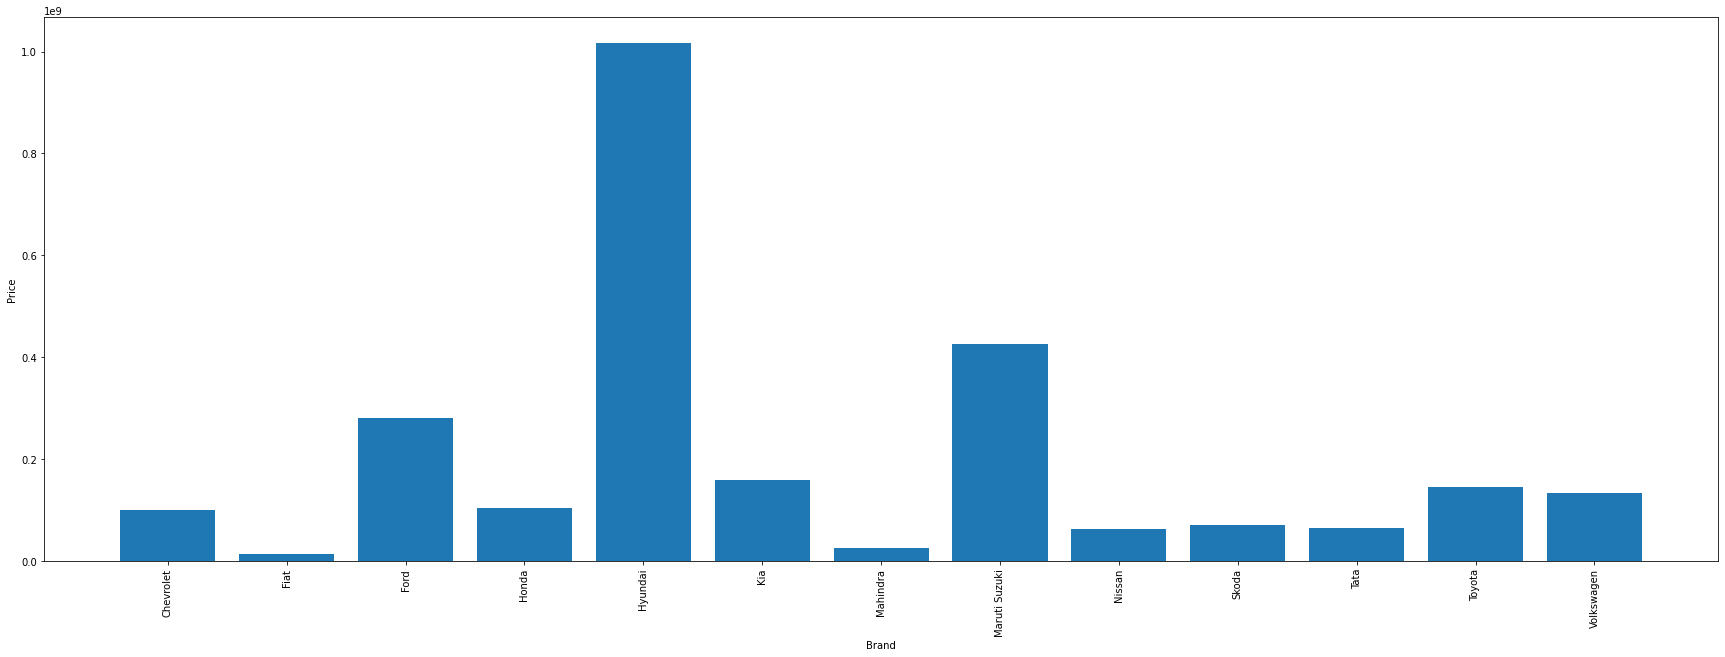

In [2169]:
# lets check how model affects our price feature
plt.subplots(figsize=(30,10))
city_revenue_group = df["Price"].groupby(df["Brand"])
agg_data = city_revenue_group.sum()
x_axis = agg_data.index
y_axis = agg_data
plt.bar(x_axis,y_axis)
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Price")
plt.show()

Hyundai and Maruti Suzuki are the leading car company whose car models are max sold and bought as used car in Nepal

There are lot of classes in Brand and Models. 

###### Each brand have their own different models . Model and brand have  similar in terms of impact on buying cars.  so instead of two separate features we can change 'Brand' and 'Model' to one single feature.

In [2170]:
df['Brand']=df['Brand']+df['Model']

In [2171]:
df = df.drop(['Model'], axis = 1)

In [2172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2216
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            1532 non-null   object 
 1   Model_year       1532 non-null   float64
 2   Transmission     1532 non-null   int64  
 3   Engine_size(cc)  1532 non-null   float64
 4   Drivetrain       1532 non-null   int64  
 5   Fuel_type        1532 non-null   int64  
 6   Lot_no           1532 non-null   float64
 7   Kilometer        1532 non-null   float64
 8   Price            1532 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 159.7+ KB


In [2173]:
# finding the top 20 categories
df.Brand.value_counts().sort_values(ascending=False).head(22)

Hyundaii10               214
Hyundaisantro            174
Maruti Suzukiswift       119
Fordfigo                  88
Hyundaiasta               78
Maruti Suzukialto-800     71
Maruti Suzukialto-LXI     71
Kiapicanto                45
Hyundaitucson             44
Tataindica                41
Volkswagenpolo            41
Hyundaii20                38
Toyotacorolla             33
Hondacity                 33
Hyundaieon                29
Chevroletaveo             29
Hyundaigetz               24
Kiasportage               23
Fordtitanium              19
Fordecosport              18
Hyundaiaccent             18
Nissansaloon              18
Name: Brand, dtype: int64

###### Top 15 car model which is maximum sold as a second hand car are:

In [2174]:
# make list with top 10 variables
top_15 = [x for x in df.Brand.value_counts().sort_values(ascending=False).head(15).index]
top_15

['Hyundaii10',
 'Hyundaisantro',
 'Maruti Suzukiswift',
 'Fordfigo',
 'Hyundaiasta',
 'Maruti Suzukialto-800',
 'Maruti Suzukialto-LXI',
 'Kiapicanto',
 'Hyundaitucson',
 'Tataindica',
 'Volkswagenpolo',
 'Hyundaii20',
 'Toyotacorolla',
 'Hondacity',
 'Hyundaieon']

lets make top 15 classes of Brand as a separate features and include it in dataframe using One Hot encoding technique.

In [2175]:
for categories in top_15:
    df[categories]=np.where(df['Brand']==categories,1,0)
top_15.append('Brand')

In [2176]:
df[top_15][100:110] #we can verify the one hot encoding values with Brand classes

,Hyundaii10,Hyundaisantro,Maruti Suzukiswift,Fordfigo,Hyundaiasta,Maruti Suzukialto-800,Maruti Suzukialto-LXI,Kiapicanto,Hyundaitucson,Tataindica,Volkswagenpolo,Hyundaii20,Toyotacorolla,Hondacity,Hyundaieon,Brand
109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fordecosport
110,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Fordfigo
111,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Fordfigo
112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fordtitanium
113,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Fordfigo
114,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Fordfigo
115,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Fordfigo
116,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Fordfigo
117,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Fordfigo
118,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Fordfigo


In [2177]:
df.head() 

,Brand,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Lot_no,Kilometer,Price,Hyundaii10,Hyundaisantro,Maruti Suzukiswift,Fordfigo,Hyundaiasta,Maruti Suzukialto-800,Maruti Suzukialto-LXI,Kiapicanto,Hyundaitucson,Tataindica,Volkswagenpolo,Hyundaii20,Toyotacorolla,Hondacity,Hyundaieon
0,Chevroletaveo,12,0,1150,0,0,6,200,975000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Chevroletcaptiva,6,1,2000,1,1,8,100,3000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Chevroletaveo,12,0,1150,0,0,6,42000,975000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chevroletcaptiva,11,1,2000,1,1,8,51000,3000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chevroletspark,9,0,1000,0,0,9,38000,1000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2178]:
# now there is no use of Brand column so lets drop it out
df.drop(['Brand'], axis='columns', inplace=True)

In [2179]:
df.describe()

,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Lot_no,Kilometer,Price,Hyundaii10,Hyundaisantro,Maruti Suzukiswift,Fordfigo,Hyundaiasta,Maruti Suzukialto-800,Maruti Suzukialto-LXI,Kiapicanto,Hyundaitucson,Tataindica,Volkswagenpolo,Hyundaii20,Toyotacorolla,Hondacity,Hyundaieon
count,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532
mean,11,0,1259,0,0,8,35015,1695821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
std,3,0,286,0,0,3,16636,786227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
min,2,0,624,0,0,1,100,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25%,9,0,1100,0,0,6,24000,1200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50%,11,0,1200,0,0,8,35000,1500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75%,13,0,1400,0,0,10,45000,2056250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
max,19,1,2000,1,1,22,85000,4200000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### Separating Dependent and Independent Features

In [2180]:
y=df['Price']
X=df.drop('Price',axis=1)
cols=X.columns
cols

Index(['Model_year', 'Transmission', 'Engine_size(cc)', 'Drivetrain',
       'Fuel_type', 'Lot_no', 'Kilometer', 'Hyundaii10', 'Hyundaisantro',
       'Maruti Suzukiswift', 'Fordfigo', 'Hyundaiasta',
       'Maruti Suzukialto-800', 'Maruti Suzukialto-LXI', 'Kiapicanto',
       'Hyundaitucson', 'Tataindica', 'Volkswagenpolo', 'Hyundaii20',
       'Toyotacorolla', 'Hondacity', 'Hyundaieon'],
      dtype='object')

In [2181]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 , f_classif

FeatureSelection = SelectKBest(score_func= chi2 ,k=18) # score_func can = f_classif 
X = FeatureSelection.fit_transform(X, y)

In [2182]:
#showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

X Shape is  (1532, 18)
Selected Features are :  [ True False  True  True  True  True  True  True  True  True False  True
  True  True False  True  True  True  True  True False  True]


In [2183]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=44, shuffle =True)

In [2184]:
#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (919, 18)
X_test shape is  (613, 18)
y_train shape is  (919,)
y_test shape is  (613,)


In [2185]:
print('Original X Shape is ' , X.shape)

Original X Shape is  (1532, 18)


### Model Building

In [2186]:
def predict(ml_model):          
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction[:10]))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)


### RandomForest Regressor

Training score : 0.9535037779253339
predictions are: 
 [1155600.   1447000.    550720.    621920.   1223200.    974400.
 1575260.   1426250.   2891700.   2852099.98]


r2 score: 0.8034950709891164
MAE: 219846.45015363846
MSE: 125987113995.8193
RMSE: 354946.6354197759


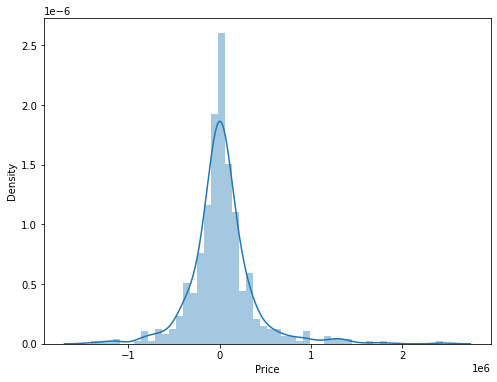

In [2187]:
predict(RandomForestRegressor(ccp_alpha=0.1,n_estimators=50, max_depth = 70))

Here the parameter of RandomForest Regressor:
+ ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen.Minimal cost-complexity pruning is an algorithm used to prune a tree to avoid over-fitting.

+ n_estimators: No. of decision trees in  a forest
+ max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


### DecisionTree Regressor

Training score : 0.9990637441857563
predictions are: 
 [ 600000. 1425000.  750000.  610000. 1225000. 1150000. 1765000. 1475000.
 3700000. 2350000.]


r2 score: 0.6746509247921271
MAE: 266490.52528548124
MSE: 208594213045.81332
RMSE: 456721.15458539175


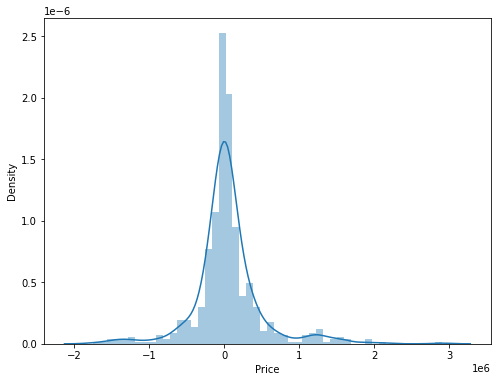

In [2188]:
predict(DecisionTreeRegressor(max_depth=25,random_state=33))

Here the parameter of DecisionTree Regressor:
+ max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

### Linear Regression

Training score : 0.7213305884828927
predictions are: 
 [1039250.01183976 1561587.7460734   420655.97079312  165593.52009557
 1282958.41806711 1503170.12563934 1623687.26690137 1468659.51066031
 2599802.88904033 2691049.806932  ]


r2 score: 0.7435097015867886
MAE: 266274.63443956524
MSE: 164446116581.723
RMSE: 405519.56374720443


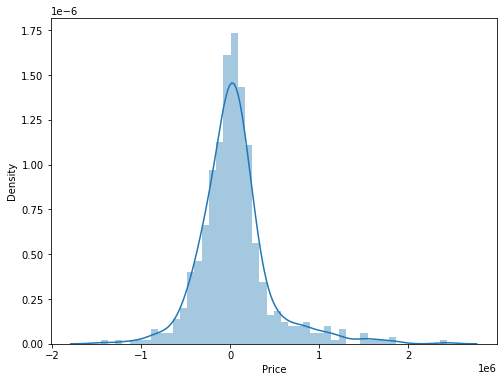

In [2189]:
predict(LinearRegression())

### Gradient Boosting

Training score : 0.9990005653983957
predictions are: 
 [ 434663.69865959 1432131.08242937  750553.45482914  571071.21411318
 1225849.8357274  1123948.23262977 1704327.22882535 1436393.53229787
 3664855.54898452 2461232.69342759]


r2 score: 0.7089750177008849
MAE: 258038.327749875
MSE: 186587673933.2028
RMSE: 431957.9538950554


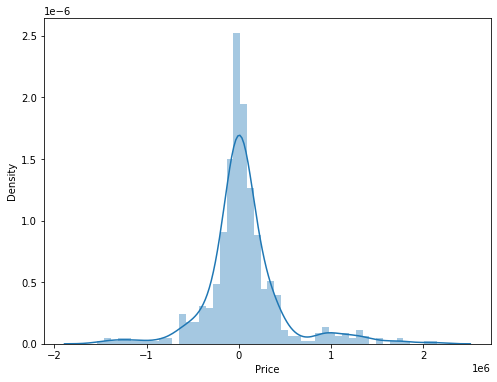

In [2190]:
predict(GradientBoostingRegressor(alpha=.9 , n_estimators=12,learning_rate=0.5, max_depth=12))

Parameters of Gradient Boosting Algorithm:
+ alphafloat, default=0.9:
The alpha-quantile of the huber loss function and the quantile loss function. Only if loss='huber' or loss='quantile'.
+ learning_rate:
Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

+ n_estimators:
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

+ max_depth: The maximum depth of the decision tree. In gradient boosting, decision tree is taken as a weak learner

Here Decision, RandomForest and GradientBoosting algorithms model works better than linear regression or any other model. Because of following reasons:
+ Ensemble model is not affected by outliers present in the dataset
+ Ensemble model performs great in unbalance dataset
+ Ensemble model is not affected by missing values.